Project: DataSc_predict_explain_diabetes       -       Creator: Benjamin Gaube       -        Date: 2024-07-14

# Cluster Diabetes into Type I and Type II
<br> 
<b>Source: </b>https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/
<br>
<b>Purpose: </b>The Outcome variable does not differ between dieabetes mellitus type I and type II, but this may be relevant for classification. <br>
<b>Approach: </b>However, diabetics generally have high blood glucose levels, but differ depending on the type of serum insulin. Type I diabetics have low insulin levels because they cannot produce insulin themselves, while type II diabetics produce a lot of insulin because the Glut4 transporter (transports sugar into the cell) is increasingly insulin-resistant, which is why the insulin level rises more to compensate. (https://flexikon.doccheck.com/de/Insulin)


## Librarys and Data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

In [2]:
# as finaly decided in 01_analyze:data_ipynb

df = pd.read_csv(r'..\..\data\Healthcare_Diabetes_Dataset\Healthcare-Diabetes.csv')
df = df.query('Glucose != 0 and BloodPressure != 0 and SkinThickness != 0 and BMI != 0')
df = df.drop_duplicates(subset=df.columns.difference(['Id']), keep='first')
df = df.drop(columns=['Pregnancies'])

C:\Dateien Benjamin\playground\Python\repo\DataSc_predict_explain_diabetes\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\49176\AppData\Local\Temp\ipykernel_6648\1785328749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['KMeans_Cluster'] = kmeans.fit_predict(df_diabetes[['Glucose', 'Insulin']])
C:\Users\49176\AppData\Local\Temp\ipykernel_6648\1785328749.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

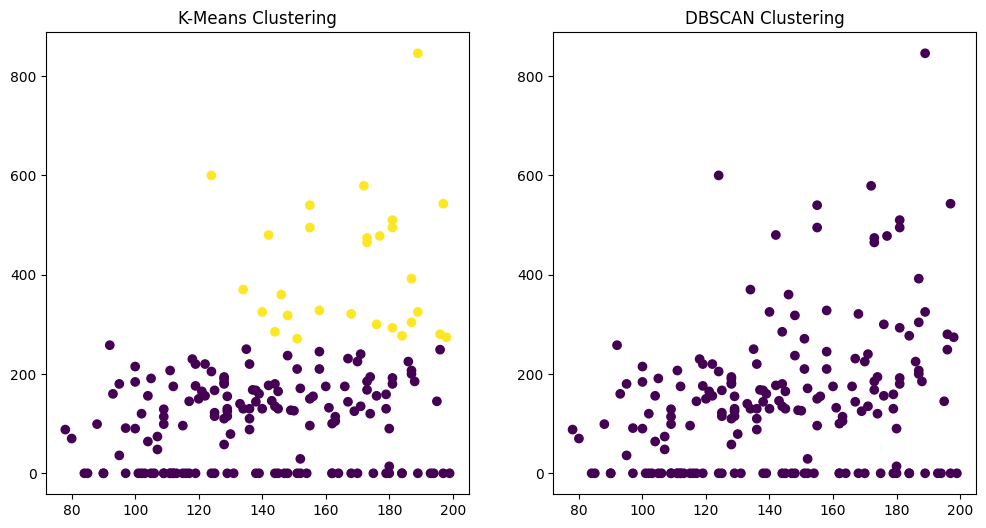

In [5]:
df_diabetes = df.query('Outcome == 1')

# K-Means Clustering
kmeans = KMeans(n_clusters=2)
df_diabetes['KMeans_Cluster'] = kmeans.fit_predict(df_diabetes[['Glucose', 'Insulin']])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
df_diabetes['DBSCAN_Cluster'] = dbscan.fit_predict(df_diabetes[['Glucose', 'Insulin']])

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(df_diabetes['Glucose'], df_diabetes['Insulin'], c=df_diabetes['KMeans_Cluster'], cmap='viridis', label='KMeans')
axes[0].set_title('K-Means Clustering')
axes[1].scatter(df_diabetes['Glucose'], df_diabetes['Insulin'], c=df_diabetes['DBSCAN_Cluster'], cmap='viridis', label='DBSCAN')
axes[1].set_title('DBSCAN Clustering')
plt.show()

C:\Dateien Benjamin\playground\Python\repo\DataSc_predict_explain_diabetes\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


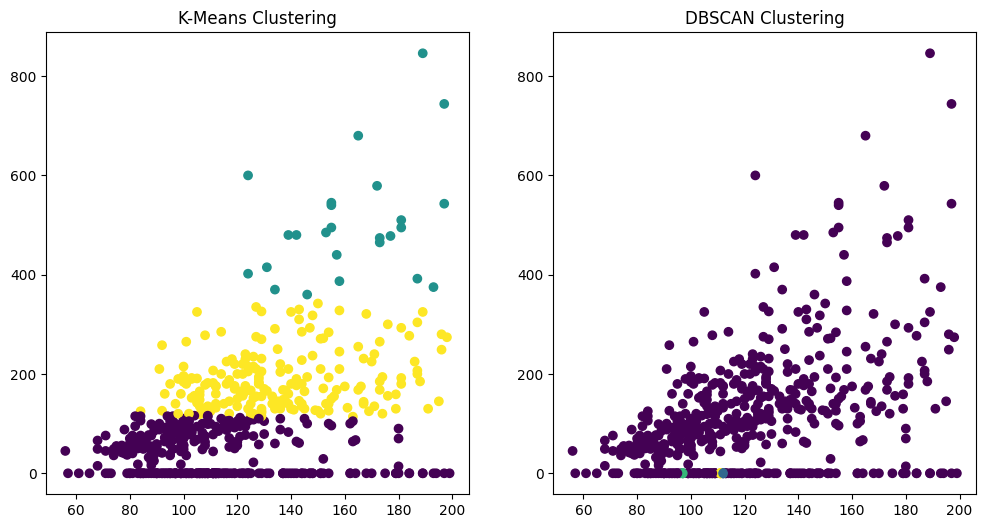

In [6]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Glucose', 'Insulin']])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Glucose', 'Insulin']])

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(df['Glucose'], df['Insulin'], c=df['KMeans_Cluster'], cmap='viridis', label='KMeans')
axes[0].set_title('K-Means Clustering')
axes[1].scatter(df['Glucose'], df['Insulin'], c=df['DBSCAN_Cluster'], cmap='viridis', label='DBSCAN')
axes[1].set_title('DBSCAN Clustering')
plt.show()